In [1]:
import pandas as pd
import numpy as np
import geopandas

In [2]:
# loads up data of all the public art in Pittsburgh and displays some
pgh_art_data = pd.read_csv("pgh_art_data.csv")
pgh_art_data.head()

,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981


In [68]:
import csv

with open ("pgh_art_data.csv") as f:
    pgh_art_data_2 = [row for row in csv.reader(f)]
    
# goes through the data and counts how many pieces of art are in each neighborhood
art_counter = dict()

for row in pgh_art_data_2[1:]:
    neighborhood = row[7]
    
    if neighborhood not in art_counter:
        art_counter[neighborhood] = 1
    else:
        art_counter[neighborhood] = art_counter[neighborhood] + 1
        
art_counter

{'Oakwood': 1,
 'Elliott': 3,
 'Central Business District': 27,
 'Carrick': 2,
 'Brookline': 2,
 'South Side Slopes': 3,
 '': 2,
 'Hazelwood': 3,
 'Highland Park': 10,
 'Squirrel Hill South': 20,
 'Perry North': 2,
 'Beltzhoover': 3,
 'Spring Hill-City View': 4,
 'West End': 2,
 'Greenfield': 3,
 'Shadyside': 6,
 'East Allegheny': 2,
 'Squirrel Hill North': 2,
 'Beechview': 7,
 'Crawford-Roberts': 3,
 'Lincoln-Lemington-Belmar': 2,
 'Hays': 1,
 'Allegheny Center': 18,
 'North Oakland': 1,
 'South Side Flats': 9,
 'Central Oakland': 5,
 'Point Breeze': 3,
 'Allegheny West': 1,
 'Strip District': 2,
 'Mount Washington': 2,
 'Brighton Heights': 5,
 'Perry South': 1,
 'North Shore': 8,
 'Upper Hill': 2,
 'Garfield': 2,
 'Central Lawrenceville': 2,
 'Upper Lawrenceville': 1,
 'Stanton Heights': 1,
 'Duquesne Heights': 3,
 'Allentown': 2,
 'East Liberty': 1,
 'Bloomfield': 1,
 'East Carnegie': 1,
 'East Hills': 1,
 'Lower Lawrenceville': 5,
 'Overbrook': 1,
 'Polish Hill': 1,
 'Regent Square

In [45]:
#displays the number of pieces of art in each neighborhood
df = pd.DataFrame({"pieces of art":art_counter,})
df.head(56)

,pieces of art
,2
Allegheny Center,18
Allegheny West,1
Allentown,2
Beechview,7
Beltzhoover,3
Bloomfield,1
Brighton Heights,5
Brookline,2
Carrick,2


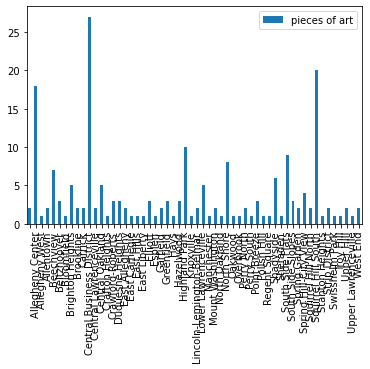

In [43]:
df.plot.bar()

In [65]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
art = pgh_art_data.groupby("neighborhood").sum()
art.head()
#neighborhoods.plot

,id,council_district,ward,tract,public_works_division,pli_division,police_zone,latitude,longitude
neighborhood,,,,,,,,,
Allegheny Center,20159895515,18.0,396.0,7.560641e+11,18.0,396.0,18.0,728.149444,-1440.124011
Allegheny West,50811008,1.0,22.0,4.200356e+10,1.0,22.0,1.0,40.451008,-80.013202
Allentown,247056894,6.0,36.0,8.400636e+10,10.0,36.0,6.0,80.847929,-159.989601
Beechview,6570994668,28.0,133.0,2.940223e+11,35.0,133.0,42.0,282.833506,-560.205902
Beltzhoover,2908702755,10.0,54.0,1.260107e+11,15.0,54.0,9.0,121.256375,-240.004913
